Best parameters: {'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel': 'linear'}
Test accuracy: 0.9875


C:\Users\jerry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
36 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jerry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jerry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\jerry\AppData\Local\Programs\Python\Python310\lib\s

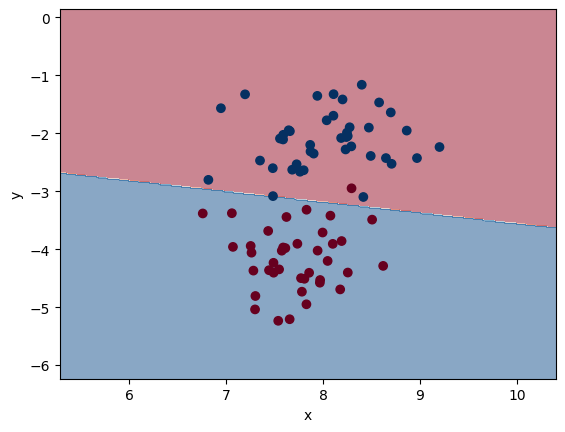

C:\Users\jerry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jerry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jerry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\jerry\AppData\Local\Programs\Python\Python310\lib\s

Best parameters: {'svc__C': 1, 'svc__gamma': 1, 'svc__kernel': 'rbf'}
Test accuracy: 0.975


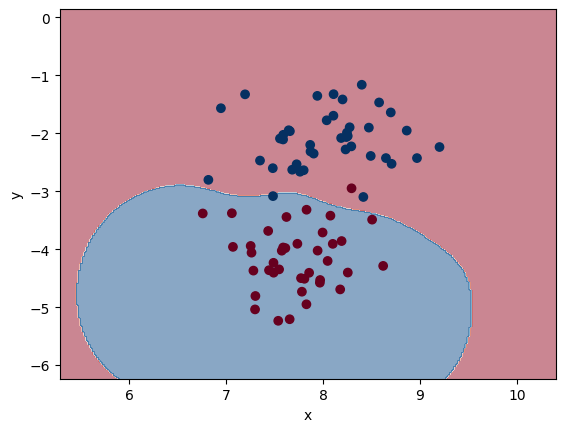

Best parameters: {'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel': 'linear'}
Test accuracy: 0.9875


C:\Users\jerry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jerry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jerry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\jerry\AppData\Local\Programs\Python\Python310\lib

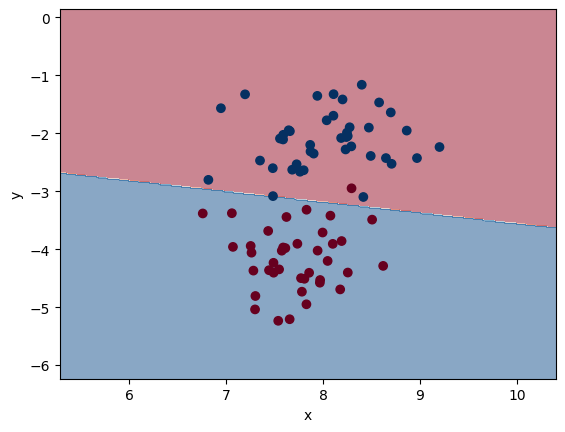

C:\Users\jerry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jerry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jerry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\jerry\AppData\Local\Programs\Python\Python310\lib\

Best parameters: {'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Test accuracy: 0.9625


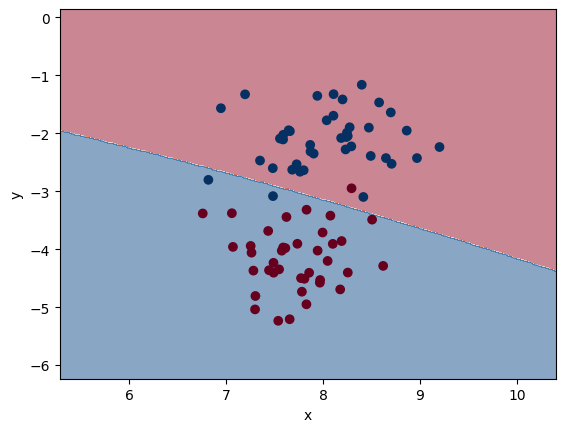

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score


# 加载数据集
data_file = 'D:\桌面\code\python\感知机\\non_separable_data.txt'
data = np.loadtxt(data_file, delimiter=',')
X, y = data[:, :2], data[:, 2]

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 定义管道模型
# C:惩罚系数
# kernel:核函数类型
# gamma:核函数的带宽
# 这些参数都会影响模型的性能和复杂度。具体来说，
# C值越大则表示更强烈地惩罚分类错误的样本，
# kernel有多种类型，例如‘linear’代表线性核，‘rbf’代表径向基核，还有其他的kernel可以选择，
# gamma越小代表模型越简单，gamma越大时，模型的拟合能力越强，容易产生过拟合
model = make_pipeline(StandardScaler(), SVC())
param_grid = {'svc__C': [0.1, 1, 10], 'svc__kernel': [
    'linear', 'poly', 'rbf', 'precomputed'], 'svc__gamma': [0.01, 0.1, 1, 10]}
# cv=5 表示使用 k 折交叉验证来评估模型性能，
# 其中 k = 5，即将数据集分成五份，轮流将其中的一份作为测试集，剩余四份作为训练集，
# 对模型进行训练和评估，最后将五次评估结果的平均值作为最终评估结果。
# 在使用 GridSearchCV 对模型进行参数调优时，cv 参数指定了交叉验证的数量。
# 在每个参数组合上进行交叉验证，并选择平均准确率最高的参数组合作为最优参数，
# 以克服可能的过度拟合问题并提高模型的泛化能力。
cvArr = [3,5,10,15]#[3,5,10,15]
for item in cvArr:
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=item)

    # 在训练集上拟合模型，并选择最优参数
    grid_search.fit(X_train, y_train)

    # 输出最优参数和在测试集上的准确率
    best_params = grid_search.best_params_
    test_accuracy = grid_search.score(X_test, y_test)
    print('Best parameters:', best_params)
    print('Test accuracy:', test_accuracy)

    # 绘制决策边界
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                         np.arange(y_min, y_max, .02))
    Z = grid_search.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.5)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdBu_r)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()
